# The imports

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Load the data as a pandas dataframe

In [3]:
df = pd.read_csv("Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Clean the data, taking care of the blank entries

In [12]:
df.isna().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
sex_int       0
smoker_int    0
region_int    0
dtype: int64

In [6]:
print(df.isnull().value_counts())

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      2772
Name: count, dtype: int64


In [5]:
print("Row missing data: ", df[df['charges'].isna()])

Row missing data:  Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [10]:
# Update Categorical data into numerical data
df['sex_int'] = np.where(df['sex'] == "male", 2, 1)
df['smoker_int'] = np.where(df['smoker'] == "no", 0, 1)

# Apply label encoding
encoder = LabelEncoder()
df['region_int'] = encoder.fit_transform(df['region'])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_int,smoker_int,region_int
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,2,0,2
2,28,male,33.000,3,no,southeast,4449.46200,2,0,2
3,33,male,22.705,0,no,northwest,21984.47061,2,0,1
4,32,male,28.880,0,no,northwest,3866.85520,2,0,1


# Run exploratory data analysis and identify the attrbiutes that most affect the charges

Text(0.5, 1.0, 'Box Children')

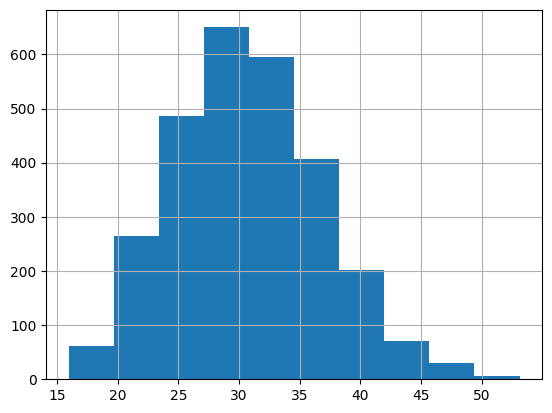

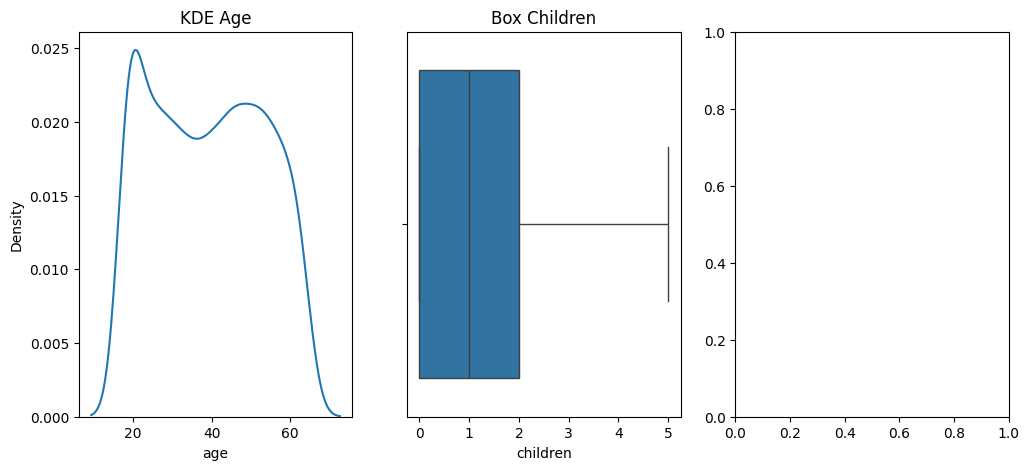

In [48]:
# Understanding the data distribution
df['bmi'].hist()

fig, axes = plt.subplots(1, 3, figsize=(12,5))
sns.kdeplot(df['age'], ax=axes[0])
axes[0].set_title("KDE Age")
sns.boxplot(x=df['children'], ax=axes[1])
axes[1].set_title("Box Children")

<Axes: xlabel='region', ylabel='count'>

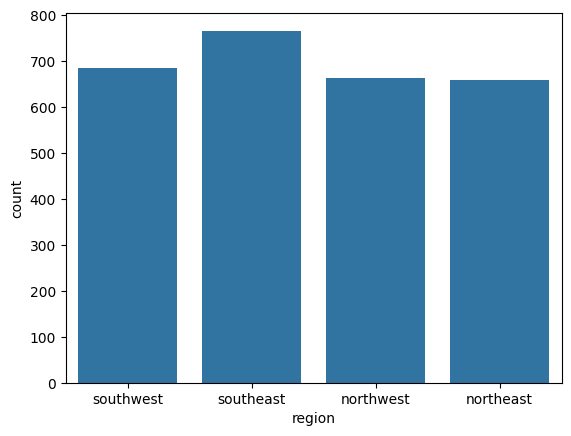

In [ ]:
# Categorical Data Analysis
df['region'].unique()
df['region'].value_counts()
sns.countplot(x='region', data=df)

             sex_int  smoker_int  region_int  children       bmi       age  \
sex_int     1.000000    0.082326    0.004808  0.016020  0.042924 -0.026046   
smoker_int  0.082326    1.000000   -0.006751  0.006362  0.011489 -0.023286   
region_int  0.004808   -0.006751    1.000000  0.016111  0.159178  0.000932   
children    0.016020    0.006362    0.016111  1.000000 -0.001492  0.037574   
bmi         0.042924    0.011489    0.159178 -0.001492  1.000000  0.113048   
age        -0.026046   -0.023286    0.000932  0.037574  0.113048  1.000000   
charges     0.062837    0.788783   -0.013530  0.066442  0.199846  0.298624   

             charges  
sex_int     0.062837  
smoker_int  0.788783  
region_int -0.013530  
children    0.066442  
bmi         0.199846  
age         0.298624  
charges     1.000000  


<Axes: >

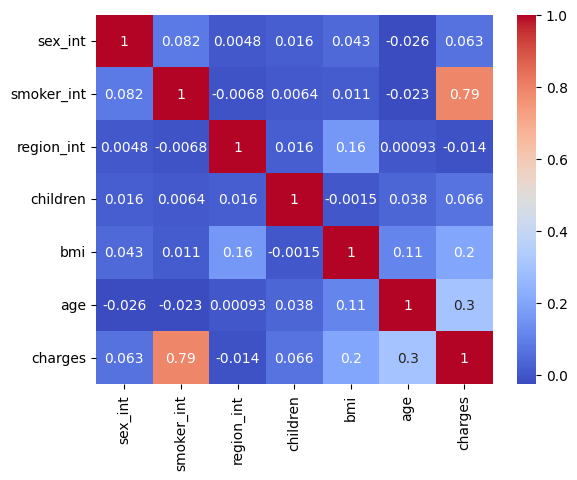

In [51]:
# Correlations & Relationships
int_only_df = df[['sex_int', 'smoker_int', 'region_int', 'children', 'bmi', 'age', 'charges']]
print(int_only_df.corr())
#sns.pairplot(df)
sns.heatmap(int_only_df.corr(), annot=True, cmap="coolwarm")

      age     sex    bmi  children smoker     region     charges  sex_int  \
116    58    male  49.06         0     no  southeast  11381.3254        2   
286    46  female  48.07         2     no  northeast   9432.9253        1   
847    23    male  50.38         1     no  southeast   2438.0552        2   
860    37  female  47.60         2    yes  southwest  46113.5110        1   
1047   22    male  52.58         1    yes  southeast  44501.3982        2   
1088   52    male  47.74         1     no  southeast   9748.9106        2   
1317   18    male  53.13         0     no  southeast   1163.4627        2   
1502   58    male  49.06         0     no  southeast  11381.3254        2   
1672   46  female  48.07         2     no  northeast   9432.9253        1   
2233   23    male  50.38         1     no  southeast   2438.0552        2   
2246   37  female  47.60         2    yes  southwest  46113.5110        1   
2433   22    male  52.58         1    yes  southeast  44501.3982        2   

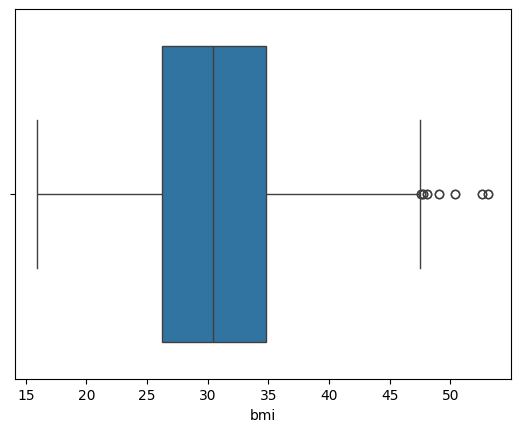

In [23]:
# Outlier Detection

sns.boxplot(x=df['bmi'])

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(df_outliers)

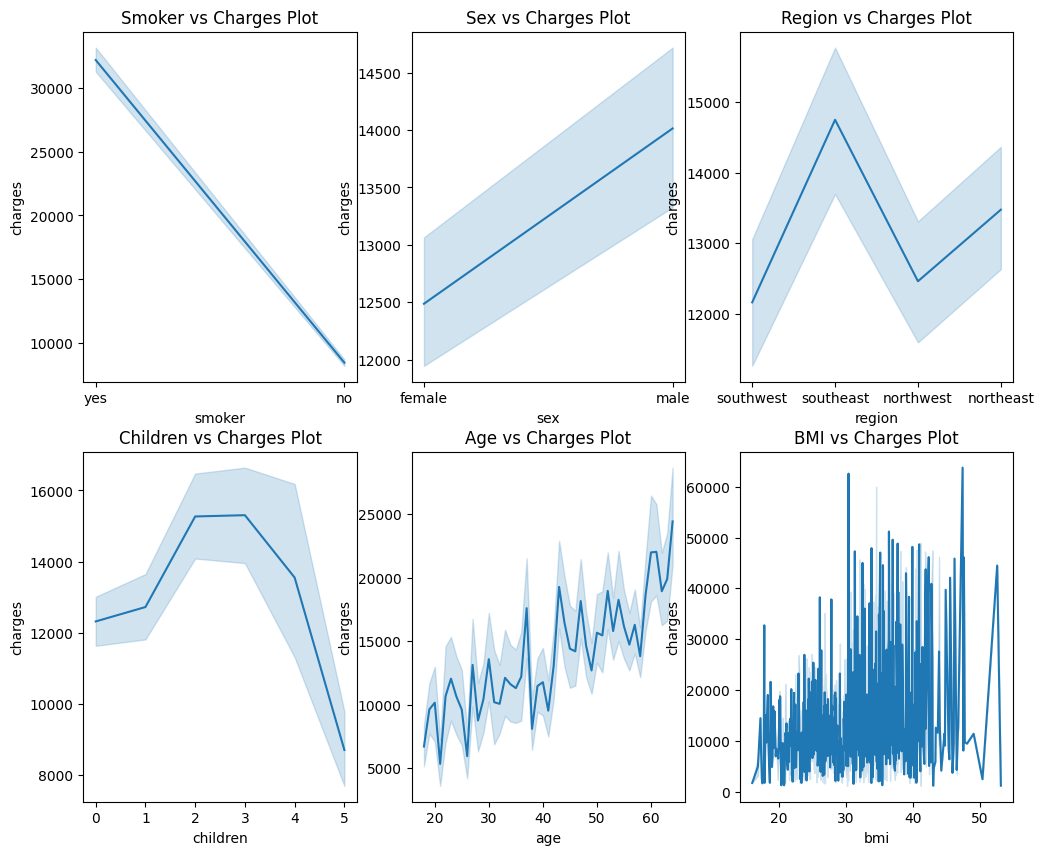

In [46]:
# Check for trends & patterns
fig, axes = plt.subplots(2, 3, figsize=(12,10))
sns.lineplot(x='smoker', y='charges', data=df, ax=axes[0][0])
axes[0][0].set_title("Smoker vs Charges Plot")
sns.lineplot(x='sex', y='charges', data=df, ax=axes[0][1])
axes[0][1].set_title("Sex vs Charges Plot")
sns.lineplot(x='region', y='charges', data=df, ax=axes[0][2])
axes[0][2].set_title("Region vs Charges Plot")
sns.lineplot(x='children', y='charges', data=df, ax=axes[1][0])
axes[1][0].set_title("Children vs Charges Plot")
sns.lineplot(x='age', y='charges', data=df, ax=axes[1][1])
axes[1][1].set_title("Age vs Charges Plot")
sns.lineplot(x='bmi', y='charges', data=df, ax=axes[1][2])
axes[1][2].set_title("BMI vs Charges Plot")

plt.show()

# Develop single variable and multi variable Linear Regression models for predicting the charges

In [52]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
         bmi
1864  36.850
1997  34.800
1336  25.800
655   25.300
261   26.840
...      ...
1638  34.210
1095  31.350
1130  23.870
1294  25.175
860   47.600

[2217 rows x 1 columns]


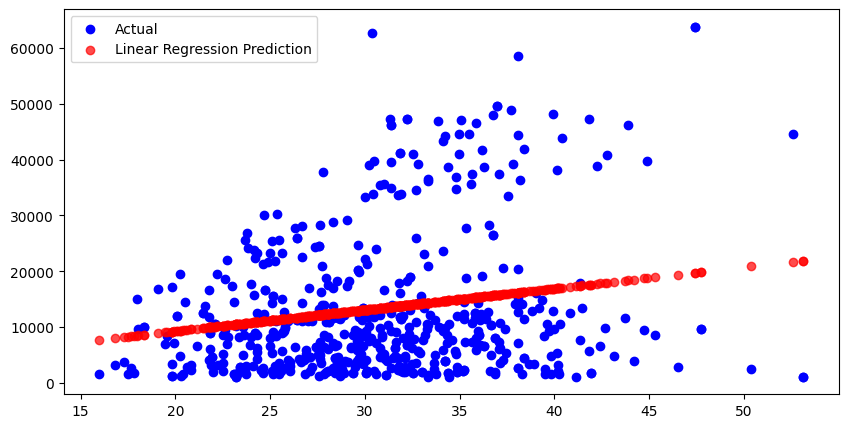

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df[['bmi']], df['charges'], test_size=0.2, random_state=42)

print(type(x_train))
print(x_train)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test, color="blue", label="Actual")
plt.scatter(x_test, y_pred, color="red", label="Linear Regression Prediction", alpha=0.7)

plt.legend()
plt.show()

# Use Ridge regression to refine the performance of Linear regression models